# The Curse of Dimensionality
***
* In ML and Data science, having too many variables(dimensions) is often treated as bad. With too many variables, you always have to check:
    1. What is the relationship between each variable?
    2. Are they violating any violations of underlying models? For eg: Features in Regression and clustering should not have any multicollinearity.
    3. Is there a danger of overfitting our model.

* Additionally, Too many variables mean:
    1. Long running time for the algorithm.
    2. Visualizing data will be very hard.
    3. Increased work by the developers.

* The problem is so common in ML/Data Science domain that, it has a dedicated name for it: "The Curse of Dimensionality".
* To overcome it, we usually make use of some Dimensionality reduction technique.

***
### Dimensionality Reduction:
***
https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

https://scikit-learn.org/stable/modules/decomposition.html
* Dimensionality reduction techniques helps in reducing the feature space, so that we have fewer relationshps between features.
* Dimensionality reduction techniques can be broadly classified into 2 categories:
        1. Feature Elimination         2. Feature Extraction

***Feature Elimination***:
    * Drop the feature.
    * It's drawback is that you gain no information from the feature.
    * Also, in some cases, it is not possible to remove the feature.
    * We usually drop the features:
        1. Which are less important, i.e., their correlation with Output variable is close to 0.
        2. Where missing values are very high(usually, 50% or higher, but it largely dependes upon size of data).
        3. Where variance of the the feature is very less. eg: All values are of same type.

__*Feature Extraction*__:
    * Feature Extraction is the process of creating/deriving new features from existing features.
    * For eg:
        1. Given Height and Weight, can we use the BMI?
        2. Given Volume and Mass, can we use the density?
    * These variables are created in a specific way and they are ordered based on how well they predict our output or represent data.
    * Principal Component Analysis(PCA), Independent Component Analysis(ICA), Linear Discriminant Analysis(LDA), Latent Dirichlet Allocation(LDA, Don't confuse it with Linear Discriminant Analysis) are few techniques for Feature Extraction.   

### Principal Component Analysis

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

__Play with PCA:__ https://setosa.io/ev/principal-component-analysis/





##### When to use PCA?

    1. When you are not sure which variables to drop and which not.
    2. When you want to ensure variables are independent of each other.
    3. When you are "OK" with making your variables less interpretable.
* You should only use PCA when you are ok with all 3 conditions above.


##### How PCA works:
1. Make sure all your columns are Numeric.
2. Take Matrix of your indepent variable X.
> X = Matrix of indepenedent variables with all numeric values.
3. For each column, subtract the mean of that column from each entry. This ensures that each column has the mean of 0.
4. Divide the each entity in column by it's Standard Deviation. Let's call this matrix as Z.
> Z = Standardized X
5. Multiply matrix Z with it's transpose. To get Covariance Matrix M.
> M = $Z^{T}Z$
6. Do Eigen Decomposition of M i.e., find it's Eigen Vectors aand Eigen Values. This will give you a Linear combination of Matrix:
> M = $Z^{T}Z$ = $PDP^{-1}$
    <br>Where:
        P = Matrix of Eigen vector
        D = Diagonal Matrix of Eigen values. Each diagonal value in D corresponds to particular column of P.
           For Eg: D[0][0] is the eigen value for 1st column,
                   D[1][1] is the eigen value for second column and so on.
* These eigen vectors will be independent of each other.
7. Sort Eigen values in descending order i.e. from Largest to Smallest. Also, exchange the corresponding columns of P as well. Let's call this matrix as P*.
> P* = sorted(P)
8. Calculate final output matrix, Z* = ZP*. This will give a centered standardized version of X where each observation is combination of original variables.
> Z* = ZP*

In [3]:
from sklearn.decomposition import PCA
import pandas as pd

In [4]:
admissions = pd.read_csv('../admissions.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [43]:
X = admissions.iloc[:,1:-1]
y = admissions[['Chance of Admit ']]

In [44]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xs = scaler.fit_transform(X)

In [46]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(Xs)

In [47]:
X_pca[:5]

array([[-3.56837458, -0.32831807],
       [-1.6391986 ,  0.03455037],
       [ 0.55099145, -0.72079379],
       [-0.34547019, -1.28023739],
       [ 2.03580394,  0.03936553]])

In [48]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-3.568375,-0.328318
1,-1.639199,0.034550
2,0.550991,-0.720794
3,-0.345470,-1.280237
4,2.035804,0.039366


In [49]:
pca_df.shape

(500, 2)

In [50]:
X.shape

(500, 7)

In [51]:
pca_df.corr()

,PC1,PC2
PC1,1.000000e+00,9.012838e-17
PC2,9.012838e-17,1.000000e+00


In [52]:
pca.explained_variance_

array([4.73582567, 0.74323771])

In [53]:
print(sum(pca.explained_variance_ratio_ * 100))
pca.explained_variance_ratio_ * 100

78.11578928354842


array([67.51934309, 10.5964462 ])

In [54]:
pca1 = PCA(0.90)

X_pca1 = pca1.fit_transform(Xs)

In [55]:
X_pca1[:5]

array([[-3.56837458, -0.32831807, -0.60867453, -0.5129757 ],
       [-1.6391986 ,  0.03455037,  0.86723365, -0.10513976],
       [ 0.55099145, -0.72079379,  0.94001376,  0.06657673],
       [-0.34547019, -1.28023739, -0.39008109,  0.57939043],
       [ 2.03580394,  0.03936553, -0.69174901, -0.61697564]])

In [56]:
print(sum(pca1.explained_variance_ratio_ * 100))
pca1.explained_variance_ratio_ * 100

91.5728338132432


array([67.51934309, 10.5964462 ,  8.02325492,  5.43378961])

In [65]:
cols = ['PC'+str(i+1) for i in range(pca1.n_components_)]
pca1_df =  pd.DataFrame(data=X_pca1, columns=cols)

pca1_df.head()

,PC1,PC2,PC3,PC4
0,-3.568375,-0.328318,-0.608675,-0.512976
1,-1.639199,0.034550,0.867234,-0.105140
2,0.550991,-0.720794,0.940014,0.066577
3,-0.345470,-1.280237,-0.390081,0.579390
4,2.035804,0.039366,-0.691749,-0.616976


In [66]:
pca1_df.corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,9.012838e-17,2.690295e-16,5.332521e-17
PC2,9.012838e-17,1.000000e+00,6.054795e-17,8.193449e-17
PC3,2.690295e-16,6.054795e-17,1.000000e+00,2.182280e-16
PC4,5.332521e-17,8.193449e-17,2.182280e-16,1.000000e+00


In [59]:
import numpy as np
y.loc[y['Chance of Admit ']>=0.72,'Admitted']=1
y.loc[y['Chance of Admit ']<0.72,'Admitted']=0
y['Admitted']=y['Admitted'].astype(np.int64)

y.head()

C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,Chance of Admit,Admitted
0,0.92,1
1,0.76,1
2,0.72,1
3,0.80,1
4,0.65,0


In [60]:
import seaborn as sns
from matplotlib import pyplot as plt

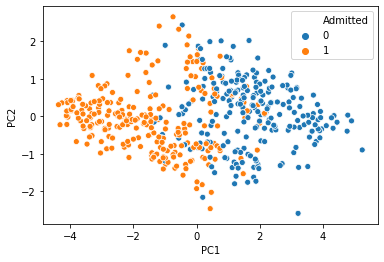

In [61]:
sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y['Admitted'])

In [84]:
df = pca1_df.copy()
df = pd.concat([pca1_df, y['Admitted']], axis=1)

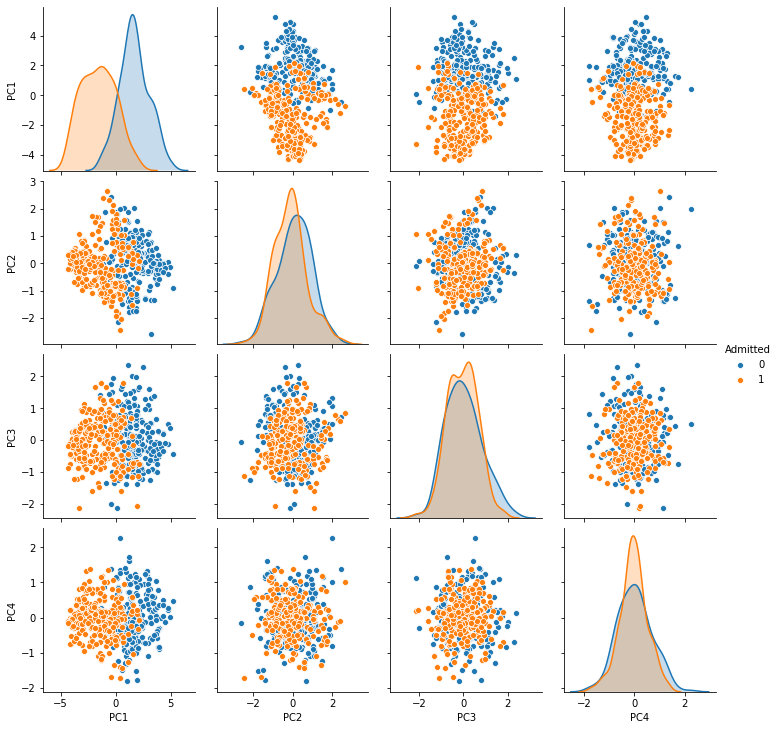

In [87]:
sns.pairplot(data=df, hue='Admitted')